In [1]:
import time
import random
class Solution:
    def bucketSort(self, nums):
        if not nums or len(nums) <= 1:
            return nums

        minNums = min(nums)
        maxNums = max(nums)

        if minNums == maxNums:
            return nums

        lenght = len(nums)

        bucket = [[] for _ in range(lenght)]
        range_per_bucket = (maxNums - minNums) / lenght

        for num in nums:
            if num == maxNums:
                bucketIdx = lenght - 1
            else:
                bucketIdx = int((num - minNums) / range_per_bucket)
            bucket[bucketIdx].append(num)

        for i in range(lenght):
            self.InsertionSort(bucket[i])

        result = []
        for buckets in bucket:
            result.extend(buckets)

        return result

    def InsertionSort(self, arr):
        n = len(arr)
        for i in range(1,n):
            key = arr[i]
            j = i - 1
            while j >= 0 and arr[j] > key:
                arr[j+1] = arr[j]
                j -= 1
            arr[j+1] = key


random_list = [random.randint(1, 1000) for _ in range(100000)]
start = time.time()
sorter = Solution()
sorter.bucketSort(random_list)
end = time.time()
print(end - start)

0.15800738334655762


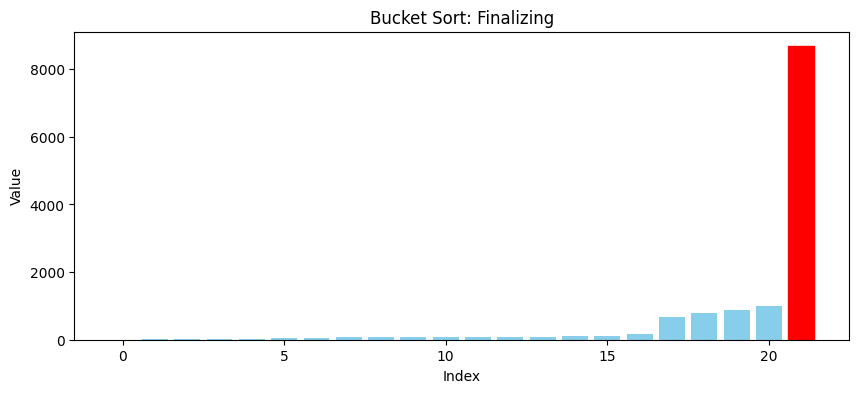

Sorted array: [170, 45, 75, 90, 802, 24, 2, 66, 90, 45, 7, 24, 78, 876, 8674, 87, 90, 8, 97, 986, 676, 98]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

class BucketSortVisualized:
    def bucketSort(self, nums, draw_func):
        if not nums or len(nums) <= 1:
            return nums

        minNums = min(nums)
        maxNums = max(nums)

        if minNums == maxNums:
            return nums

        lenght = len(nums)
        bucket = [[] for _ in range(lenght)]
        range_per_bucket = (maxNums - minNums) / lenght

        for num in nums:
            if num == maxNums:
                bucketIdx = lenght - 1
            else:
                bucketIdx = int((num - minNums) / range_per_bucket)
            bucket[bucketIdx].append(num)
            draw_func(nums, highlight_indices=[nums.index(num)], title=f"Bucket Sort: Placing {num}")


        sorted_nums = []
        for i in range(lenght):
            self.InsertionSort(bucket[i])
            sorted_nums.extend(bucket[i])
            draw_func(sorted_nums, title=f"Bucket Sort: Sorting Bucket {i}")


        # Update the original list with sorted values
        for i in range(len(nums)):
            nums[i] = sorted_nums[i]
            draw_func(nums, highlight_indices=[i], title="Bucket Sort: Finalizing")


    def InsertionSort(self, arr):
        n = len(arr)
        for i in range(1, n):
            key = arr[i]
            j = i - 1
            while j >= 0 and arr[j] > key:
                arr[j+1] = arr[j]
                j -= 1
            arr[j+1] = key


def draw_bars(arr, highlight_indices=None, title="Bucket Sort"):
    clear_output(wait=True)
    plt.figure(figsize=(10, 4))
    bars = plt.bar(range(len(arr)), arr, color='skyblue')
    if highlight_indices:
        for idx in highlight_indices:
            if idx < len(bars):
                bars[idx].set_color('red')
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()
    time.sleep(0.1)

# Example Usage:
data = [170, 45, 75, 90, 802, 24, 2, 66, 90,45,7,24,78,876,8674,87,90,8,97,986,676,98]
bucket_sorter = BucketSortVisualized()
bucket_sorter.bucketSort(data.copy(), draw_bars) # Use a copy to keep original data
print("Sorted array:", data)